In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd


In [161]:
poke_csv="Resources/clean_data.csv"
poke_df= pd.read_csv(poke_csv)
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:>

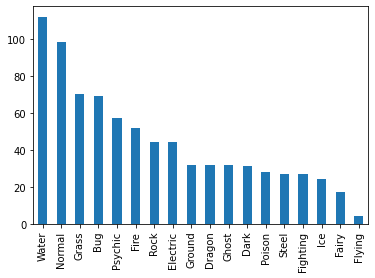

In [162]:
poke_df["Type1"].value_counts().plot.bar()

<AxesSubplot:>

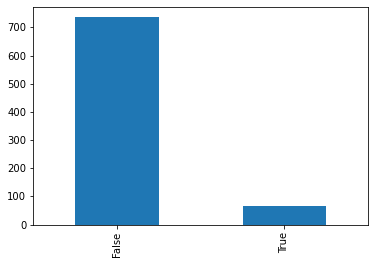

In [163]:
poke_df["Legendary"].value_counts().plot.bar()

In [164]:
#Clean the dataframe to include only relevant columns and create a recode column for each type 
poke_df["Type1_Recode"] = ""
poke_df["Type2_Recode"] = ""
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Type1_Recode,Type2_Recode
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,,
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,,
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,,
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,,
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,,
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,,
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,,
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,,


In [165]:
#Gather list of unique pokemon types
type1_list = poke_df["Type1"].unique()
type1_list

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [166]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(poke_df["Type1"])
encoded_type1 = label_encoder.transform(poke_df["Type1"])

In [167]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_type1 = to_categorical(encoded_type1)
one_hot_type1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [168]:
# Create df of one hot encoding
hot_df = pd.DataFrame(one_hot_type1)
hot_df

#Merge the encoding with the pokemon dataframe
merged_df = pd.merge(poke_df,hot_df, how='outer', left_index=True, right_index=True)
merged_df

#Rename the columns
final_df = merged_df.rename(columns = {0:"Grass",
                                       1:"Fire",
                                       2:"Water",
                                       3:"Bug",
                                       4:"Normal",
                                      5:"Poison",
                                      6:"Electric",
                                      7:"Ground",
                                      8:"Fairy",
                                      9:"Fighting",
                                      10:"Psychic",
                                      11:"Rock",
                                      12:"Ghost",
                                      13:"Ice",
                                      14:"Dragon",
                                      15:"Dark",
                                      16:"Steel",
                                      17:"Flying"})
final_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [169]:
# #Normalize the data
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(final_df[["Total","HP","Attack","Defense","SpAtk","SpDef", "Speed"]])
final_df[["Total","HP","Attack","Defense","SpAtk","SpDef", "Speed"]] = transformer.transform(final_df[["Total","HP","Attack","Defense","SpAtk","SpDef", "Speed"]])

final_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,0.924067,0.130764,0.142388,0.142388,0.188882,0.188882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,0.924672,0.136988,0.141555,0.143838,0.182651,0.182651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,0.925136,0.140973,0.144497,0.146260,0.176216,0.176216,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,0.923685,0.118232,0.147790,0.181781,0.180303,0.177348,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,0.923809,0.116597,0.155463,0.128556,0.179380,0.149484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,0.914991,0.076249,0.152499,0.228748,0.152499,0.228748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,0.919145,0.065653,0.210090,0.144437,0.210090,0.144437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,0.918846,0.122513,0.168455,0.091885,0.229711,0.199083,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,0.916745,0.107852,0.215705,0.080889,0.229186,0.175260,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [170]:
#Split the sample by legendary status
legendary_df = final_df[final_df["Legendary"] == True]
nonlegend_df = final_df[final_df["Legendary"] == False]

#Display the lengths of each df
print(len(legendary_df), len(nonlegend_df))

65 735


In [171]:
#Take 80% non legendary and 20% of legendary
train_legendary_df = legendary_df.sample(n=int((len(legendary_df)*.8)))
train_nonlegend_df = nonlegend_df.sample(n=int((len(nonlegend_df)*.8)))

#Using 100 nonlegendary since the size was skewing the dataset

In [172]:
train_df = train_legendary_df.append(train_nonlegend_df)
train_df = train_df.sort_index()
train_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,0.924067,0.130764,0.142388,0.142388,0.188882,0.188882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,0.925136,0.140973,0.144497,0.146260,0.176216,0.176216,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,0.923685,0.118232,0.147790,0.181781,0.180303,0.177348,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Charmeleon,Fire,NaN,0.924585,0.132410,0.146107,0.132410,0.182634,0.148390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Charizard,Fire,Flying,0.924703,0.135069,0.145459,0.135069,0.188750,0.147191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,716,Xerneas,Fairy,NaN,0.924483,0.171301,0.178099,0.129156,0.178099,0.133234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,717,Yveltal,Dark,Flying,0.924483,0.171301,0.178099,0.129156,0.178099,0.133234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,719,Diancie,Rock,Fairy,0.914991,0.076249,0.152499,0.228748,0.152499,0.228748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,0.919145,0.065653,0.210090,0.144437,0.210090,0.144437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [173]:
#Create the difference of the final and sample df
test_df = pd.concat([final_df, train_df]).loc[
    final_df.index.symmetric_difference(train_df.index)
]

test_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
1,2,Ivysaur,Grass,Poison,0.924672,0.136988,0.141555,0.143838,0.182651,0.182651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,0.923809,0.116597,0.155463,0.128556,0.179380,0.149484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6,CharizardMega Charizard Y,Fire,Flying,0.921412,0.113360,0.151147,0.113360,0.231080,0.167133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7,Squirtle,Water,NaN,0.923905,0.129464,0.141234,0.191254,0.147119,0.188312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,13,Weedle,Bug,Poison,0.918729,0.188457,0.164900,0.141343,0.094229,0.094229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,710,PumpkabooLarge Size,Ghost,Grass,0.923900,0.148927,0.182022,0.193054,0.121348,0.151685,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,715,Noivern,Flying,Dragon,0.923392,0.146707,0.120818,0.138077,0.167419,0.138077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794,718,Zygarde50% Forme,Dragon,Ground,0.924812,0.166466,0.154135,0.186504,0.124850,0.146429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,0.918846,0.122513,0.168455,0.091885,0.229711,0.199083,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [174]:
from sklearn.model_selection import train_test_split
x = train_df
y = train_df['Legendary']
x = x.drop(["Legendary","Name","#","Type1","Type2", "Type1_Recode","Type2_Recode","Generation"],1)
x

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Grass,Fire,Water,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,0.924067,0.130764,0.142388,0.142388,0.188882,0.188882,0.130764,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925136,0.140973,0.144497,0.146260,0.176216,0.176216,0.140973,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.923685,0.118232,0.147790,0.181781,0.180303,0.177348,0.118232,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.924585,0.132410,0.146107,0.132410,0.182634,0.148390,0.182634,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.924703,0.135069,0.145459,0.135069,0.188750,0.147191,0.173165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,0.924483,0.171301,0.178099,0.129156,0.178099,0.133234,0.134594,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,0.924483,0.171301,0.178099,0.129156,0.178099,0.133234,0.134594,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,0.914991,0.076249,0.152499,0.228748,0.152499,0.228748,0.076249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.919145,0.065653,0.210090,0.144437,0.210090,0.144437,0.144437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 47, test_size = 0.20)

In [176]:
from imblearn.over_sampling import SMOTE

# sampling ration of 1.0 will equally balance the binary classes
sm = SMOTE(random_state=15,sampling_strategy= 1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [177]:
X_train_res.shape

(948, 25)

In [178]:
#Showing the amount of legendary pokemon created
(y_train_res == True).sum()

474

In [179]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
model = RandomForestClassifier(n_estimators=100,max_depth=7)

In [180]:
#Training the random forest classifier. 
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=7)

In [181]:
y_pred =  model.predict(X_test)

In [182]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_res, y_pred=model.predict(X_train_res)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9683544303797469
Accuracy Score on test data:  0.859375


In [125]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Attack,0.147
SpAtk,0.147
HP,0.125
Speed,0.109
Total,0.077
Dragon,0.075
Flying,0.061
SpDef,0.052
Defense,0.037


In [79]:
#Predicting labels on the test set.
y_pred =  model.predict(X_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
model = RandomForestClassifier(n_estimators=100,max_depth=7)

In [132]:
# get linear regression
from sklearn.linear_model import LinearRegression

In [134]:
clf = RandomForestClassifier()

In [135]:
# fit the data 
clf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [136]:
# predict the model
clf.predict(X_test)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False]

In [137]:
# check the score of the model

clf.score(X_test, y_test)

0.9453125